# Filtering and edge detection

We can utilize the 2-D convolution to perform various
types of images processing. Examples can be noise reduction
and edge detection.

---

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from image_utils import rgb2gray, conv2d

In [3]:
lviv = rgb2gray(mpimg.imread('../data/images/lviv.jpg'))
prague = mpimg.imread('../data/images/prague.jpg')

## Noise reduction

One of the simplest forms of images denoising is convolving it with an **(weighted) average filter**.

In [18]:
avg_filter = np.ones((2,2))
lviv_filtered = conv2d(lviv, avg_filter)

# in the case of 3-channel images,
# we need to convolve each channel separately
def conv2d_prague(kernel: np.ndarray):
    prague_conv = [
        conv2d(prague[:,:,i], kernel) for i in range(3)
    ]
    return np.array(prague_conv).transpose(1,2,0)

prague_filtered = conv2d_prague(avg_filter)

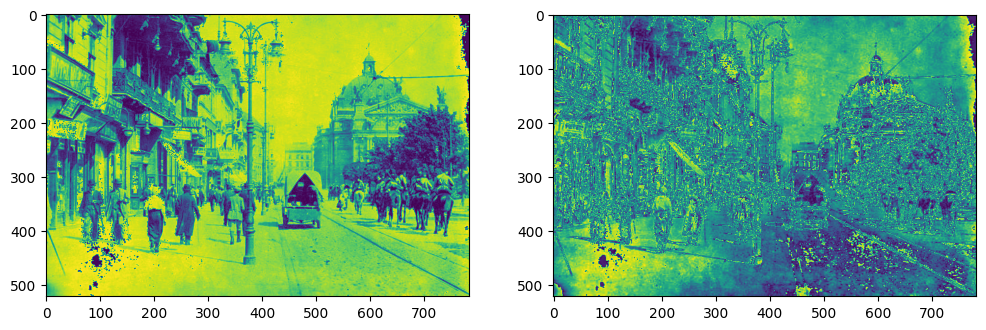

In [15]:
fig, axes = plt.subplots(1,2,figsize=(12,5))
axes[0].imshow(lviv)
axes[1].imshow(lviv_filtered)

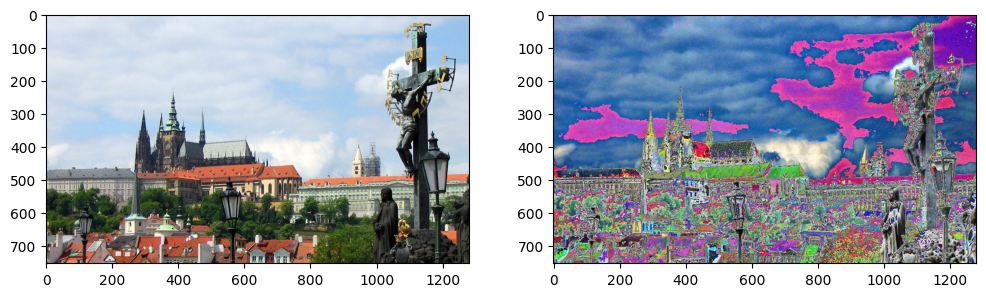

In [19]:
fig, axes = plt.subplots(1,2,figsize=(12,5))
axes[0].imshow(prague)
axes[1].imshow(prague_filtered)

In [17]:
prague_filtered